In [52]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 0.22.1


In [53]:
data = pd.read_csv('train_XnW6LSF.csv')
test_set = pd.read_csv('test_FewQE9B.csv')


In [54]:
data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [55]:
data.isnull().sum()
#test_set.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [56]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [57]:
# filling missing values of categorical variables with mode
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)
test_set['Outlet_Size'].fillna(test_set['Outlet_Size'].mode()[0], inplace=True)



In [58]:
# filling missing values of continuous variables with mean
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
test_set['Item_Weight'].fillna(test_set['Item_Weight'].mean(), inplace=True)

In [59]:
# checking missing values after imputation
data.isnull().sum()
#test_set.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [60]:
data.Item_Fat_Content.unique()


array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
data.Item_Type.unique()


array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [17]:
data.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [18]:
data.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [19]:
data.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [20]:
data.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [61]:
data.replace('LF', 'Low Fat', inplace=True)
data.replace('low fat', 'Low Fat', inplace=True)
data.replace('reg', 'Regular', inplace=True)

test_set.replace('LF', 'Low Fat', inplace=True)
test_set.replace('low fat', 'Low Fat', inplace=True)
test_set.replace('reg', 'Regular', inplace=True)



In [16]:
data.Item_Fat_Content.unique()
test_set.Item_Fat_Content.unique()



array(['Low Fat', 'Regular'], dtype=object)

In [62]:
# converting the categories into numbers using map function
data['Item_Fat_Content'] = data['Item_Fat_Content'].map({'Low Fat': 0,'Regular':1 })
test_set['Item_Fat_Content'] = test_set['Item_Fat_Content'].map({'Low Fat': 0,'Regular':1 })


In [63]:
data['Item_Type'] = data['Item_Type'].map({'Dairy': 0,'Soft Drinks':1,'Meat':2, 'Fruits and Vegetables':3,
       'Household':4, 'Baking Goods':5, 'Snack Foods':6, 'Frozen Foods':7,
       'Breakfast':8, 'Health and Hygiene':9, 'Hard Drinks':10, 'Canned':11,
       'Breads':12, 'Starchy Foods':13, 'Others':14, 'Seafood':15})

test_set['Item_Type'] = test_set['Item_Type'].map({'Dairy': 0,'Soft Drinks':1,'Meat':2, 'Fruits and Vegetables':3,
       'Household':4, 'Baking Goods':5, 'Snack Foods':6, 'Frozen Foods':7,
       'Breakfast':8, 'Health and Hygiene':9, 'Hard Drinks':10, 'Canned':11,
       'Breads':12, 'Starchy Foods':13, 'Others':14, 'Seafood':15})


In [64]:
data['Outlet_Identifier'] = data['Outlet_Identifier'].map({'OUT049':0, 'OUT018':1, 'OUT010':2, 'OUT013':3, 'OUT027':4, 'OUT045':5,
       'OUT017':6, 'OUT046':7, 'OUT035':8, 'OUT019':9 })
test_set['Outlet_Identifier'] = test_set['Outlet_Identifier'].map({'OUT049':0, 'OUT018':1, 'OUT010':2, 'OUT013':3, 'OUT027':4, 'OUT045':5,
       'OUT017':6, 'OUT046':7, 'OUT035':8, 'OUT019':9 })


In [65]:
data['Outlet_Size'] = data['Outlet_Size'].map({'Medium':2, 'High':1, 'Small':0 })
test_set['Outlet_Size'] = test_set['Outlet_Size'].map({'Medium':2, 'High':1, 'Small':0 })


In [66]:
data['Outlet_Type'] = data['Outlet_Type'].map({'Supermarket Type1':1, 'Supermarket Type2':2, 'Grocery Store':0,
       'Supermarket Type3':3 })
test_set['Outlet_Type'] = test_set['Outlet_Type'].map({'Supermarket Type1':1, 'Supermarket Type2':2, 'Grocery Store':0,
       'Supermarket Type3':3 })

In [67]:
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].map({'Tier 1':0, 'Tier 3':1, 'Tier 2':2})

test_set['Outlet_Location_Type'] = test_set['Outlet_Location_Type'].map({'Tier 1':0, 'Tier 3':1, 'Tier 2':2})


In [68]:
data.dtypes
#test_set.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [69]:
data.isnull().sum()
#test_set.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [71]:
data.head(20)
#test_set.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,0,0.016047,0,249.8092,0,1999,2,0,1,3735.1380
1,DRC01,5.920000,1,0.019278,1,48.2692,1,2009,2,1,2,443.4228
2,FDN15,17.500000,0,0.016760,2,141.6180,0,1999,2,0,1,2097.2700
3,FDX07,19.200000,1,0.000000,3,182.0950,2,1998,2,1,0,732.3800
4,NCD19,8.930000,0,0.000000,4,53.8614,3,1987,1,1,1,994.7052
5,FDP36,10.395000,1,0.000000,5,51.4008,1,2009,2,1,2,556.6088
6,FDO10,13.650000,1,0.012741,6,57.6588,3,1987,1,1,1,343.5528
7,FDP10,12.857645,0,0.127470,6,107.7622,4,1985,2,1,3,4022.7636
8,FDH17,16.200000,1,0.016687,7,96.9726,5,2002,2,2,1,1076.5986
9,FDU28,19.200000,1,0.094450,7,187.8214,6,2007,2,2,1,4710.5350


In [72]:
# applying for loop to bring all the variables in range 0 to 1

for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())
    
# applying for loop to bring all the variables in range 0 to 1

for i in test_set.columns[1:]:
    test_set[i] = (test_set[i] - test_set[i].min()) / (test_set[i].max() - test_set[i].min())

In [73]:
data.head()
#test_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,0.0,0.048866,0.000000,0.927507,0.000000,0.583333,1.0,0.0,0.333333,0.283587
1,DRC01,0.081274,1.0,0.058705,0.066667,0.072068,0.111111,1.000000,1.0,0.5,0.666667,0.031419
2,FDN15,0.770765,0.0,0.051037,0.133333,0.468288,0.000000,0.583333,1.0,0.0,0.333333,0.158115
3,FDX07,0.871986,1.0,0.000000,0.200000,0.640093,0.222222,0.541667,1.0,0.5,0.000000,0.053555
4,NCD19,0.260494,0.0,0.000000,0.266667,0.095805,0.333333,0.083333,0.5,0.5,0.333333,0.073651


In [75]:
data.dtypes
#test_set.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
dtype: object

In [76]:
# removing the loan_ID since these are just the unique values
data = data.drop('Item_Identifier', axis=1)
test_set = test_set.drop('Item_Identifier', axis=1)


In [77]:
# looking at the shape of the data
data.shape

(8523, 11)

In [78]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Item_Outlet_Sales', axis=1)

# storing the dependent variable as y
y = data['Item_Outlet_Sales']

In [79]:
# shape of independent and dependent variables
X.shape, y.shape

((8523, 10), (8523,))

In [80]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)

In [81]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((6818, 10), (6818,)), ((1705, 10), (1705,)))

In [82]:
# checking the version of keras
import keras
print(keras.__version__)

2.4.3


In [83]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.2.0


In [84]:
# importing the sequential model
from keras.models import Sequential

In [85]:
# importing different layers from keras
from keras.layers import InputLayer, Dense 

In [86]:
# number of input neurons
X_train.shape

(6818, 10)

In [87]:
# number of features in the data
X_train.shape[1]


10

In [88]:
# defining input neurons
input_neurons = X_train.shape[1]

In [89]:
# define number of output neurons
output_neurons = 1

In [104]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [105]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='relu'))

In [106]:
# summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [91]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_layer_1

100

In [92]:
# number of parameters between input and first hidden layer

# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 10

110

In [93]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

55

In [94]:
# number of parameters between second hidden and output layer

neuron_hidden_layer_2*output_neurons + 1

6

In [93]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [94]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0143 - mse: 0.0143 - mae: 0.0919 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0763
Epoch 2/100
214/214 [==============================] - 0s 927us/step - loss: 0.0094 - mse: 0.0094 - mae: 0.0731 - val_loss: 0.0084 - val_mse: 0.0084 - val_mae: 0.0671
Epoch 3/100
214/214 [==============================] - 0s 890us/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0670 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0641
Epoch 4/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0645 - val_loss: 0.0076 - val_mse: 0.0076 - val_mae: 0.0637
Epoch 5/100
214/214 [==============================] - 0s 934us/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0638 - val_loss: 0.0075 - val_mse: 0.0075 - val_mae: 0.0623
Epoch 6/100
214/214 [==============================] - 0s 886us/step - loss: 0.0074 - mse: 0.0074 - mae: 0.0627 - val_loss: 0.0073 - val_mse: 0.0073 - val_mae: 0.0615
Ep

Epoch 99/100
214/214 [==============================] - 0s 947us/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0585 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0589
Epoch 100/100
214/214 [==============================] - 0s 877us/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0583 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0579


In [95]:
test_set.head(100)
test_set['Item_Outlet_Sales'] = model.predict(test_set)
test_set

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.964275,0.0,0.023374,0.400000,0.323413,0.000000,0.583333,1.0,0.0,0.333333,0.114583
1,0.222983,1.0,0.118737,0.000000,0.235849,0.666667,0.916667,1.0,1.0,0.333333,0.089722
2,0.598095,0.0,0.307674,0.933333,0.894140,0.222222,0.541667,1.0,0.5,0.000000,0.007955
3,0.164335,0.0,0.047548,0.400000,0.524488,0.666667,0.916667,1.0,1.0,0.333333,0.165237
4,0.484706,1.0,0.366458,0.000000,0.862069,0.444444,0.000000,1.0,0.5,1.000000,0.410529
...,...,...,...,...,...,...,...,...,...,...,...
5676,0.353974,1.0,0.041702,0.400000,0.466011,0.777778,0.500000,0.0,0.0,0.333333,0.186334
5677,0.181304,1.0,0.441825,0.866667,0.584637,0.111111,1.000000,1.0,0.5,0.666667,0.169048
5678,0.324204,0.0,0.227194,0.600000,0.369798,0.555556,0.708333,1.0,1.0,0.333333,0.129839
5679,0.639774,1.0,0.000000,0.733333,0.778487,0.666667,0.916667,1.0,1.0,0.333333,0.271410


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


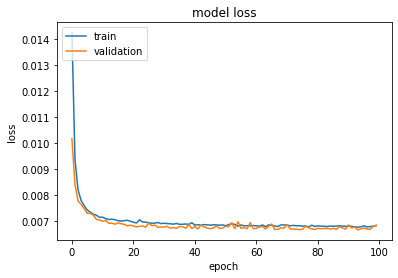

In [96]:
print(model_history.history.keys())

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [233]:
#test_set.rename(columns={"prediction": "Item_Outlet_Sales"}, inplace=True)
#test_set

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.964275,0.0,0.023374,0.400000,0.323413,0.000000,0.583333,1.0,0.0,0.333333,0.130908
1,0.222983,1.0,0.118737,0.000000,0.235849,0.666667,0.916667,1.0,1.0,0.333333,0.103082
2,0.598095,0.0,0.307674,0.933333,0.894140,0.222222,0.541667,1.0,0.5,0.000000,0.025275
3,0.164335,0.0,0.047548,0.400000,0.524488,0.666667,0.916667,1.0,1.0,0.333333,0.177025
4,0.484706,1.0,0.366458,0.000000,0.862069,0.444444,0.000000,1.0,0.5,1.000000,0.442276
...,...,...,...,...,...,...,...,...,...,...,...
5676,0.353974,1.0,0.041702,0.400000,0.466011,0.777778,0.500000,0.0,0.0,0.333333,0.170631
5677,0.181304,1.0,0.441825,0.866667,0.584637,0.111111,1.000000,1.0,0.5,0.666667,0.179936
5678,0.324204,0.0,0.227194,0.600000,0.369798,0.555556,0.708333,1.0,1.0,0.333333,0.130087
5679,0.639774,1.0,0.000000,0.733333,0.778487,0.666667,0.916667,1.0,1.0,0.333333,0.271296


In [236]:
final_df = test_set[['Outlet_Identifier','Item_Outlet_Sales']]
final_df

,Outlet_Identifier,Item_Outlet_Sales
0,0.000000,0.130908
1,0.666667,0.103082
2,0.222222,0.025275
3,0.666667,0.177025
4,0.444444,0.442276
...,...,...
5676,0.777778,0.170631
5677,0.111111,0.179936
5678,0.555556,0.130087
5679,0.666667,0.271296


In [99]:
df_for_id = pd.read_csv('test_FewQE9B.csv')

final_df = pd.DataFrame()

final_df['Item_Identifier'] = df_for_id['Item_Identifier'].values

final_df['Outlet_Identifier'] = df_for_id['Outlet_Identifier'].values
final_df['Item_Outlet_Sales']=test_set['Item_Outlet_Sales']

final_df = final_df[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]

final_df

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,0.114583
1,FDW14,OUT017,0.089722
2,NCN55,OUT010,0.007955
3,FDQ58,OUT017,0.165237
4,FDY38,OUT027,0.410529
...,...,...,...
5676,FDB58,OUT046,0.186334
5677,FDD47,OUT018,0.169048
5678,NCO17,OUT045,0.129839
5679,FDJ26,OUT017,0.271410


In [100]:
final_df.to_csv("output_results.csv",index=False)
